### Погрешности 

In [169]:
# random fault of the slope
def RR(i, v):
    s1 = s2 = 0
    for index in range(1, len(i) + 1):
        s1+=i[index]*v[index]
        s2+=i[index]**2
    return s1/s2

def random_fault(i, v, n):
    s1 = s2 = 0
    for index in range(1, len(i) + 1):
        s1+=v[index]**2
        s2+=i[index]**2
    return ((1/(n-1))*(s1/s2 - (RR(i, v))**2))**0.5
        
    

In [170]:

def sistematic_fault(i, v, delta_i, delta_v):
    return RR(i, v)*((delta_v/max(v))**2 + (delta_i/max(i))**2)**0.5

In [178]:
def full_fault(sist_fault, rand_fault):
    return (sist_fault**2 + rand_fault**2)**0.5

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
n = 7

table1 = pd.DataFrame({
                        'Uv, mV': [5*61, 5*73.5, 5*79.5, 5*86, 5*92, 5*97, 5*104],
                        'Ia, mA': [147.7, 178.74, 193, 208.45, 223.45, 236.83, 252.8],},  index= [1, 2, 3, 4, 5, 6, 7])
table1

,"Uv, mV","Ia, mA"
1,305.0,147.70
2,367.5,178.74
3,397.5,193.00
4,430.0,208.45
5,460.0,223.45
6,485.0,236.83
7,520.0,252.80


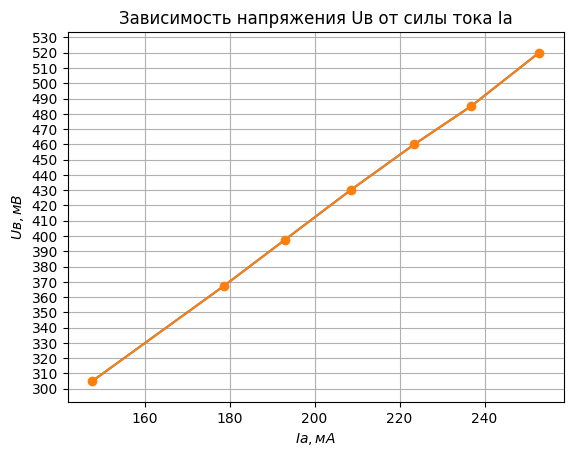

In [173]:
x = table1['Ia, mA']
y = table1['Uv, mV']
plt.plot(x, y)
plt.xlabel(r'$Iа, мА$')
plt.ylabel(r'$Uв, мВ$')
plt.grid(True)
plt.yticks(np.arange(0, 750, 10))

xerr = 0.5
yerr = 2.5
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o-', ecolor='red')

plt.title(r'Зависимость напряжения Uв от силы тока Iа')
plt.show()

In [174]:
model1 = np.polyfit(x, y, 1)
R1 = model1[0]

In [183]:
print("R1 = ", R1)
print("RR1 = ", RR(x, y))
model1

R1 =  2.040468365183917
RR1 =  2.0572037989115546


array([2.04046837, 3.53518569])

In [179]:
rand_fault1 = random_fault(x, y, n)
sist_fault1 = sistematic_fault(x, y, xerr, yerr)
full_fault1 = full_fault(sist_fault1, rand_fault1)

In [181]:
print("full_fault1 = ", full_fault1)

full_fault1 =  0.01089597686792475


### Таблица №2
#### Зависимость напряжения от силы тока при l = 30cm

In [144]:
table2 = pd.DataFrame({
                        'Uv, mV': [88, 97, 106.5, 115, 124, 132.5, 141.5],
                        'Ia, mA': [144.47, 159.48, 174.55, 187.95, 203.5, 217.13, 232.17],},  index= [1, 2, 3, 4, 5, 6, 7])

for i in range(1, n + 1):
    table2['Uv, mV'][i] =table2['Uv, mV'][i]*5
table2

,"Uv, mV","Ia, mA"
1,440.0,144.47
2,485.0,159.48
3,532.5,174.55
4,575.0,187.95
5,620.0,203.50
6,662.5,217.13
7,707.5,232.17


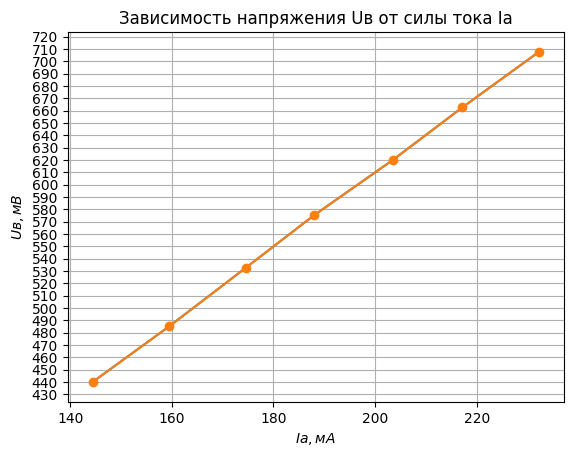

In [143]:

x2 = table2['Ia, mA']
y2 = table2['Uv, mV']

plt.plot(x2, y2)
plt.xlabel(r'$Iа, мА$')
plt.ylabel(r'$Uв, мВ$')
plt.grid(True)
plt.yticks(np.arange(0, 750, 10))

xerr = 0.5
yerr = 2.5
plt.errorbar(x2, y2, xerr=xerr, yerr=yerr, fmt='o-', ecolor='red')

plt.title(r'Зависимость напряжения Uв от силы тока Iа')
plt.show()

In [145]:
model2 = np.polyfit(x2, y2, 1)

In [186]:
print("R2 = ", model2[0])
print("RR2 = ", RR(x2, y2))
model2

R2 =  3.0561298000466217
RR2 =  3.0492450514766243


array([ 3.0561298 , -1.32846267])

In [187]:
rand_fault2 = random_fault(x2, y2, n)
sist_fault2 = sistematic_fault(x2, y2, xerr, yerr)
full_fault2 = full_fault(sist_fault2, rand_fault2)
print("full_fault2 = ", full_fault2)

full_fault2 =  0.012779131955527148


### Таблица 3
#### Зависимость напряжения от силы тока при l = 50cm

In [148]:
table3 = pd.DataFrame({
                        'Uv, mV': [21.5, 32.5, 43, 68, 82.5, 97, 109.5],
                        'Ia, mA': [21.42, 32.2, 42.8, 67.8, 82, 96.58, 109.12],},  index= [1, 2, 3, 4, 5, 6, 7])

for i in range(1, n + 1):
    table3['Uv, mV'][i] =table3['Uv, mV'][i]*5
    
table3

,"Uv, mV","Ia, mA"
1,107.5,21.42
2,162.5,32.20
3,215.0,42.80
4,340.0,67.80
5,412.5,82.00
6,485.0,96.58
7,547.5,109.12


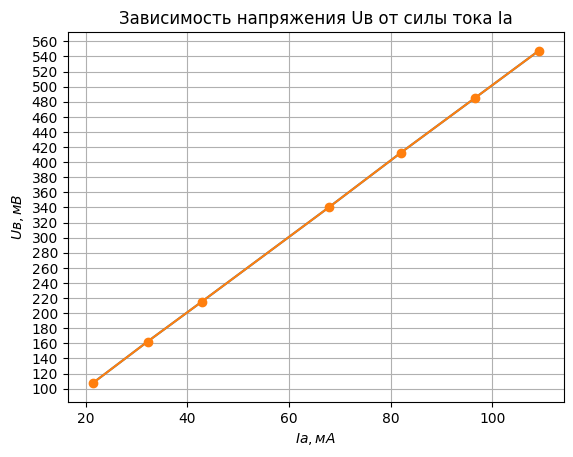

In [151]:
x3 = table3['Ia, mA']
y3 = table3['Uv, mV']
plt.plot(x3, y3)
plt.xlabel(r'$Iа, мА$')
plt.ylabel(r'$Uв, мВ$')
plt.grid(True)
plt.yticks(np.arange(0, 750, 20))

xerr = 0.5
yerr = 2.5
plt.errorbar(x3, y3, xerr=xerr, yerr=yerr, fmt='o-', ecolor='red')

plt.title(r'Зависимость напряжения Uв от силы тока Iа')
plt.show()

In [152]:
model3 = np.polyfit(x3, y3, 1)

In [188]:
print("R3 = ", model3[0])
print("RR3 = ", RR(x3, y3))
model3

R3 =  5.016577579014476
RR3 =  5.021810034862212


array([5.01657758, 0.41546578])

In [ ]:
rand_fault3 = random_fault(x3, y3, n)
sist_fault3 = sistematic_fault(x3, y3, xerr, yerr)
full_fault3 = full_fault(sist_fault3, rand_fault3)
print("full_fault3 = ", full_fault3)